# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import datetime
import nltk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load Data

In [2]:
df_tweets = pd.read_csv('C:/Users/melin/Documents/Springboard Data Science Career Track/Capstone Projects/Capstone Project 2/df_tweets.csv')
df_tweets.head()

,created_at,screen_name,text,source,is_quote,is_retweet,favourites_count,retweet_count,followers_count,friends_count,account_created_at,verified,lang,cleaned_text
0,2020-04-09 10:44:14,MistyLonavala,"During this lockdown, #StayHome and find littl...",Twitter Web App,False,False,18,0,44,280,2018-03-27 05:48:28,False,en,dure thi lockdown stayhom find littl reason sm...
1,2020-04-20 10:17:39,Striving4ZenNYC,Experts say it may be time for grocery stores ...,Twitter for iPhone,False,False,4628,1,1354,2115,2010-09-14 15:06:16,False,en,expert say may time groceri store ban custom c...
2,2020-04-10 21:15:34,Lexipol,New Online Class on our #Coronavirus Learning ...,Pardot,False,False,583,0,1637,649,2013-04-24 15:13:22,False,en,new onlin class coronaviru learn amp polici ce...
3,2020-03-29 15:39:21,marychaostyle,We’re fortunate to live in a community rich wi...,Twitter for iPhone,False,False,5134,0,4109,2844,2010-09-12 20:21:45,True,en,fortun live commun rich interest architectur b...
4,2020-04-08 13:40:07,TheScoop_US,Gun sales SURGE upward as #Coronavirus spreads...,Hootsuite Inc.,False,False,56732,1,39920,2243,2017-02-04 07:35:13,False,en,gun sale surg upward coronaviru spread arm bac...


# Examining Word Frequency

In [3]:
#Create a table of the 20 most frequent words from the uncleaned text column
print('20 Most Frequent Words of "text" in df_tweets')
text_unclean = Counter(" ".join(df_tweets['text']).split()).most_common(20)
for word, count in text_unclean: #having the keys and counts to be printed out of dictionary
    print(word + ": " + str(count))

20 Most Frequent Words of "text" in df_tweets
the: 676274
to: 587454
of: 387471
and: 350276
#COVID19: 338809
in: 304725
a: 275341
is: 228198
for: 220682
#coronavirus: 219873
on: 154589
are: 145382
you: 120559
with: 114367
this: 112726
that: 103937
from: 99601
I: 97879
be: 95896
have: 94678


100 Most Frequent Words of "text" in df_tweets


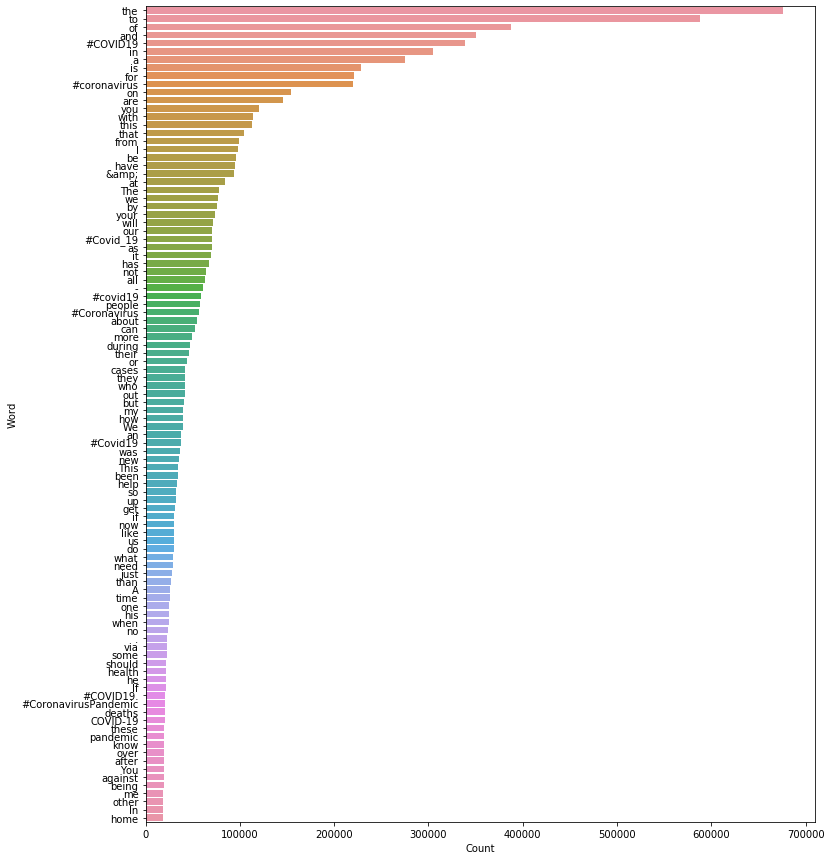

In [4]:
#Create a function that makes a word frequency bar plot
def freq_words(x, terms): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(xlabel = 'Count', ylabel = 'Word')  
  plt.show()
  
#print 100 most frequent words of the text column in the reduced df_tweets dataframe
print('100 Most Frequent Words of "text" in df_tweets')
freq_words(df_tweets['text'], 100)

In [5]:
#Remove rows containing missing values under the cleaned_text column 
df_tweets = df_tweets[df_tweets['cleaned_text'].notnull()]

#Create a table of the 20 most frequent words from the cleaned text column
print('20 Most Frequent Words of "cleaned_text" in df_tweets')
text_clean = Counter(" ".join(df_tweets['cleaned_text']).split()).most_common(20)
for word, count in text_clean: #having the keys and counts to be printed out of dictionary
    print(word + ": " + str(count))

20 Most Frequent Words of "cleaned_text" in df_tweets
covid: 699249
coronaviru: 359817
thi: 162462
ha: 105424
amp: 100171
peopl: 75339
face: 73449
u: 71537
pandem: 66172
case: 65781
new: 54336
time: 52703
help: 52416
death: 51804
dure: 51541
need: 49000
get: 48069
test: 47329
lockdown: 45714
day: 44848


100 Most Frequent Words of "cleaned_text" in df_tweets


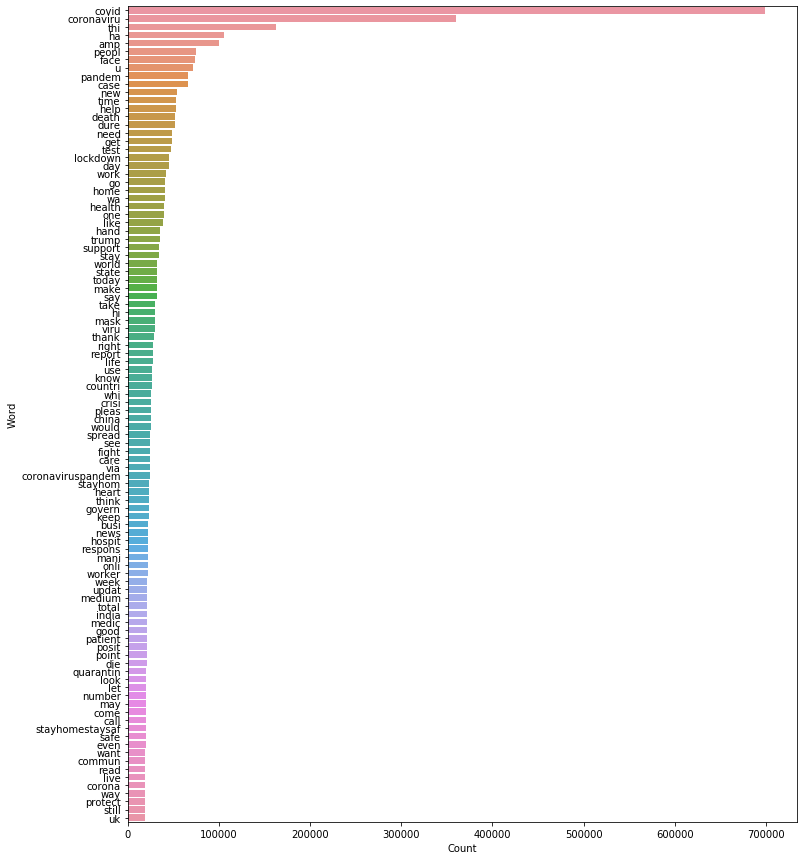

In [6]:
# print 100 most frequent words of the cleaned_text column in the reduced df_tweets dataframe
print('100 Most Frequent Words of "cleaned_text" in df_tweets')
freq_words(df_tweets['cleaned_text'], 100)

# Initial Statistical Analysis

Text(0, 0.5, 'Twitter Account Verified')

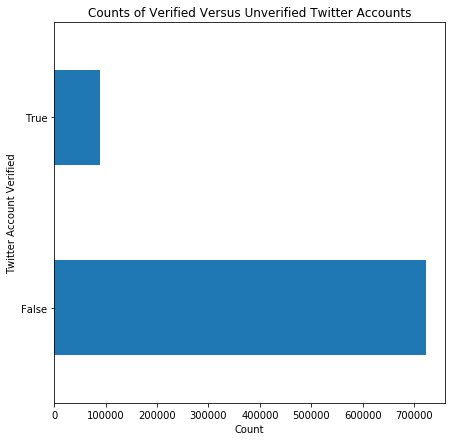

In [7]:
# Create horizontal barplot displaying number of verified and unverified Twitter accounts
plt.figure(figsize=(7, 7))
CountVerified = pd.value_counts(df_tweets['verified'].values, sort=True)
CountVerified.plot.barh()
plt.title('Counts of Verified Versus Unverified Twitter Accounts')
plt.xlabel("Count")
plt.ylabel("Twitter Account Verified")

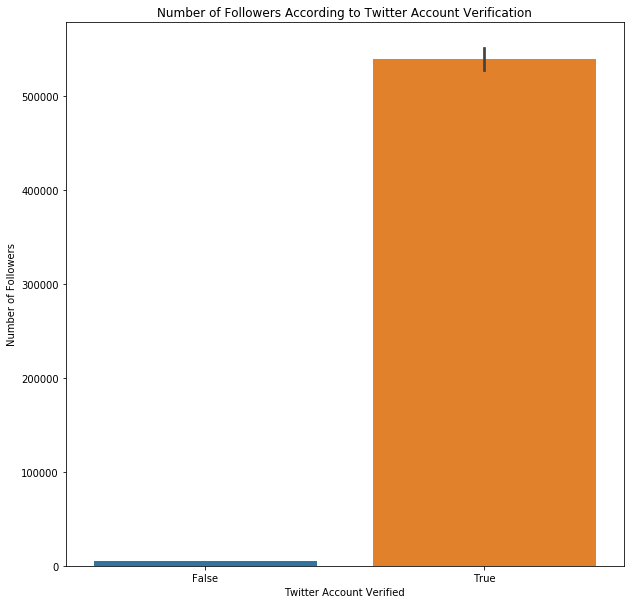

In [8]:
# Create barplot comparing the verified variable to the followers_count variable
plt.figure(figsize=(10,10)) 
ax = sns.barplot(data=df_tweets, x= "verified", y = "followers_count") 
ax.set(xlabel = 'Twitter Account Verified', ylabel = 'Number of Followers', title = 'Number of Followers According to Twitter Account Verification')  
plt.show()

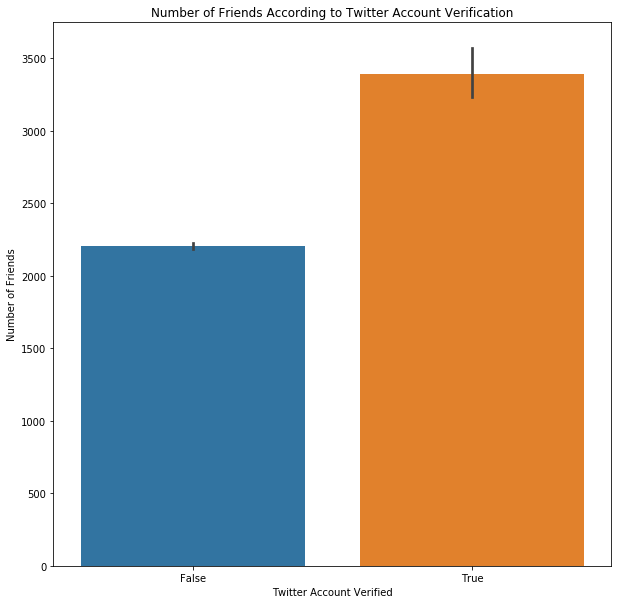

In [9]:
# Create barplot comparing the verified variable to the friends_count variable
plt.figure(figsize=(10,10)) 
ax = sns.barplot(data=df_tweets, x= "verified", y = "friends_count") 
ax.set(xlabel = 'Twitter Account Verified', ylabel = 'Number of Friends', title = 'Number of Friends According to Twitter Account Verification')  
plt.show()

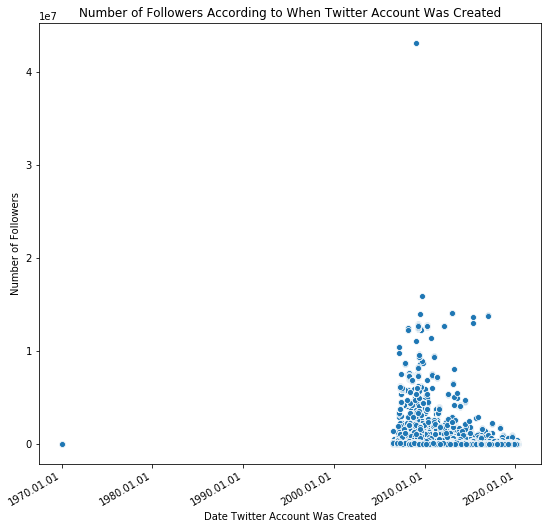

In [10]:
# Create scatterplot comparing the account_created_at variable to the followers_count variable

#Set the account_created_at column to a Datetime format 
df_tweets.account_created_at = pd.to_datetime(df_tweets.account_created_at)

# build the figure
fig, ax = plt.subplots(figsize=(9,9))
plot = sns.scatterplot(data=df_tweets, x= "account_created_at", y = "followers_count") 
plot.set(xlabel = 'Date Twitter Account Was Created', ylabel = 'Number of Followers', title = 'Number of Followers According to When Twitter Account Was Created')  

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()

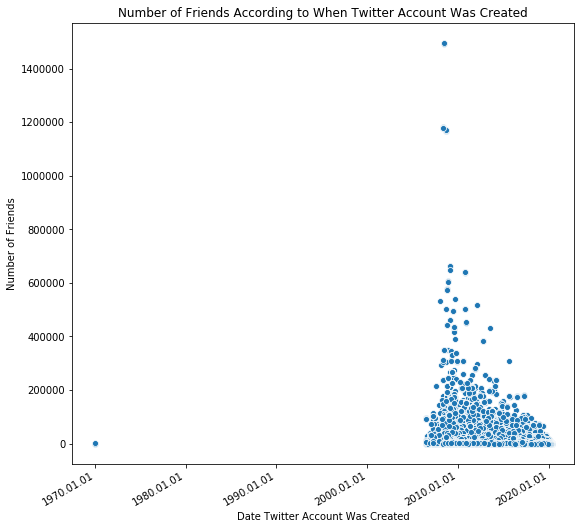

In [11]:
# Create scatterplot comparing the account_created_at variable to the friends_count variable

# build the figure
fig, ax = plt.subplots(figsize=(9,9))
plot = sns.scatterplot(data=df_tweets, x= "account_created_at", y = "friends_count") 
plot.set(xlabel = 'Date Twitter Account Was Created', ylabel = 'Number of Friends', title = 'Number of Friends According to When Twitter Account Was Created')  

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()